In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

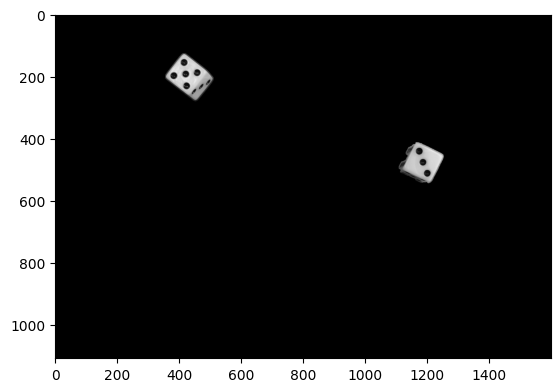

(<Figure size 640x480 with 1 Axes>,
 None)

In [2]:
image = cv2.imread("dadostp2.jpg", cv2.IMREAD_COLOR)      # Cargo imagen 
plt.figure(), plt.imshow(image), plt.show(block=False)

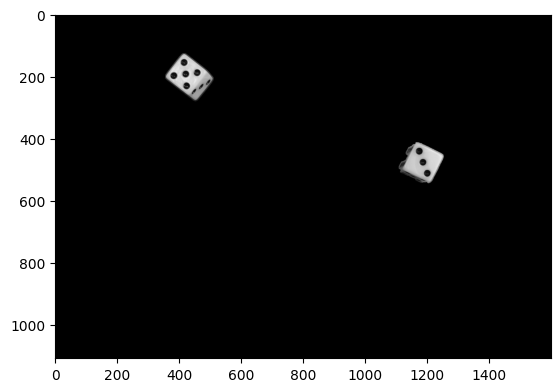

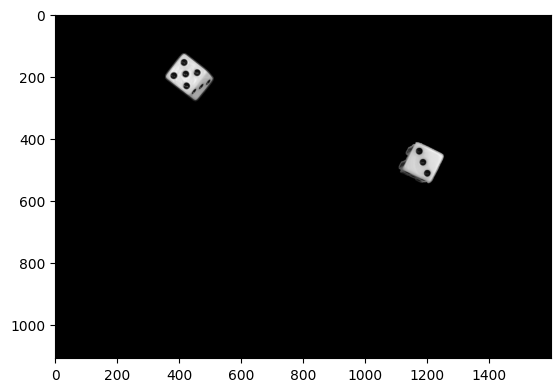

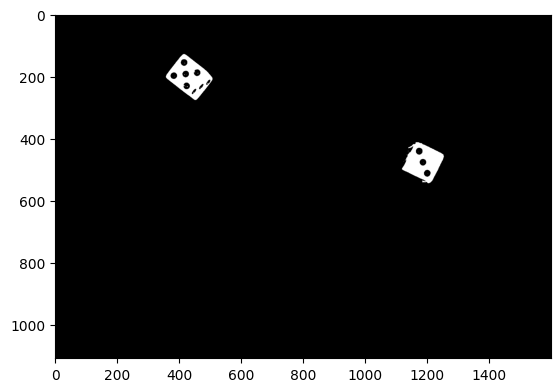

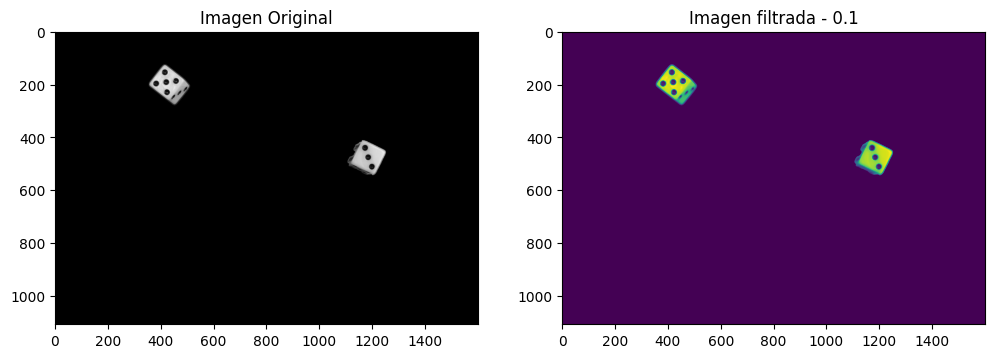

In [3]:
# Leer la imagen en color
img= cv2.imread("dadostp2.jpg")
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W = img.shape[:2]
plt.imshow(img, cmap = 'gray'), plt.show(block = False)

#Imagen filtrada gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray"), plt.show(block = False)

# --- Binarizo ------------------------------------------------------------------------------------
th, binary_img = cv2.threshold(img_gray, 125, 1, cv2.THRESH_OTSU)
plt.figure(), plt.imshow(binary_img, cmap='gray'), plt.show(block=False)

kernel_size = 7  # Tamaño del kernel de mediana
img_filtered = cv2.medianBlur(img_gray, kernel_size)

# Muestra las imágenes originales y las filtradas
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_color)
plt.title('Imagen Original')
plt.subplot(122)
plt.imshow(img_filtered)
plt.title('Imagen filtrada - 0.1')
plt.show()

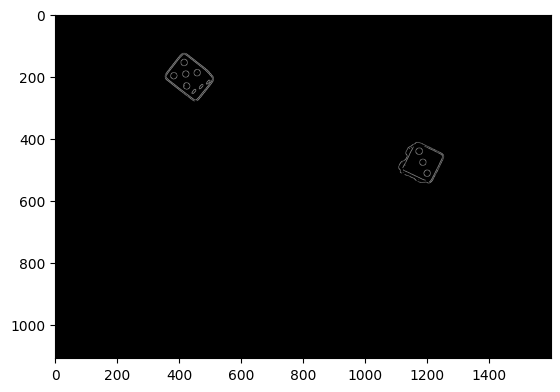

(<matplotlib.image.AxesImage at 0x2cd4ae80e80>, None)

In [4]:
#Canny
img_canny_CV2 = cv2.Canny(img_filtered, 150, 150)#, apertureSize=3, L2gradient=True)
plt.imshow(img_canny_CV2, cmap="gray"), plt.show(block = False)

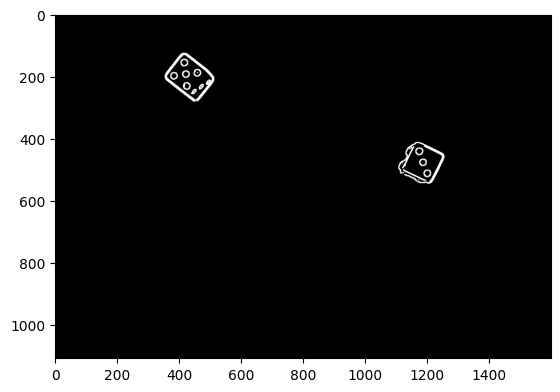

(<matplotlib.image.AxesImage at 0x2cd4ae2cd30>, None)

In [5]:
#Dilato
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
Fd = cv2.dilate(img_canny_CV2, kernel, iterations=1)
plt.imshow(Fd, cmap = "gray"), plt.show(block=False)

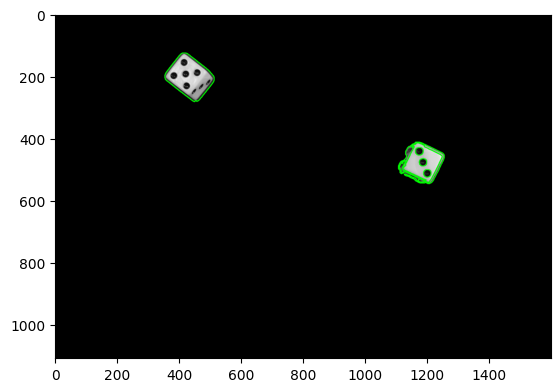

In [6]:
# Encontrar contornos en la imagen después de la operación de cierre
contours, _ = cv2.findContours(Fd, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos en la imagen original
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)  # -1: dibujar todos los contornos encontrados

plt.imshow(img_contours)

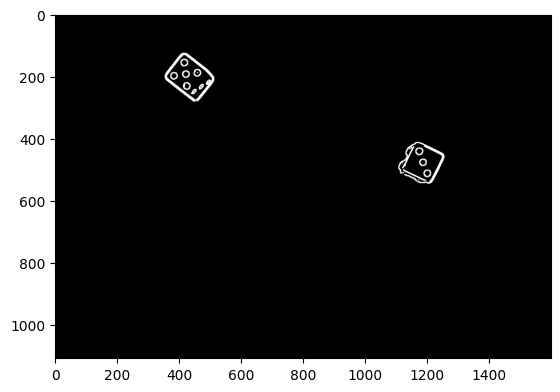

(<Figure size 640x480 with 1 Axes>,
 None)

In [7]:
# --- Operaciones morfológicas para mejorar la segmentación obtenida ------------------------------
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
binary_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, se)   # Apertura para remover elementos pequeños
binary_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, se)  # Clausura para rellenar huecos.
plt.figure(), plt.imshow(Fd, cmap='gray'), plt.show(block=False)

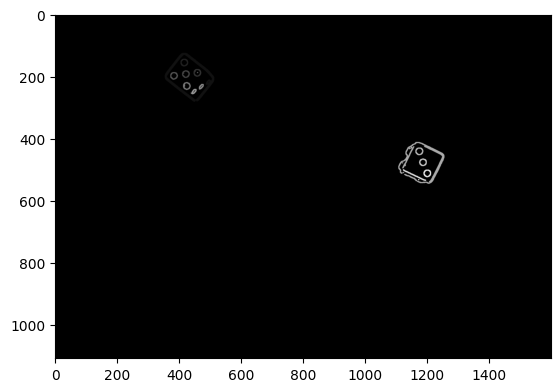

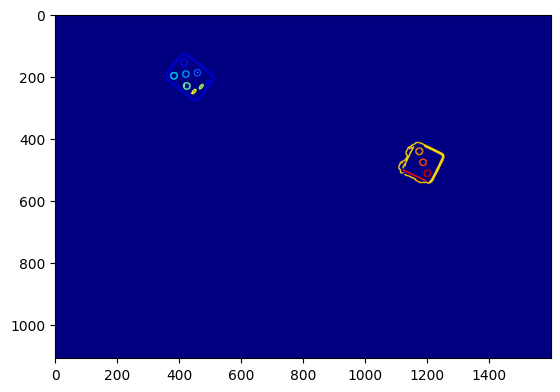

(<Figure size 640x480 with 1 Axes>,
 None)

In [8]:

# --- Componentes conectadas ------------------------------------------------------------
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(Fd)
plt.figure(), plt.imshow(labels, cmap='gray'), plt.show(block=False)                # Visualizo los objetos con sus labels en ESCALA DE GRISES

labels_color = np.uint8(255/(num_labels-1)*labels)                  # Llevo el rango de valores a [0 255] para diferenciar mejor los colores
# np.unique(labels_color)                                           # Por si quieren verificar los valores asignados....
im_color = cv2.applyColorMap(labels_color, cv2.COLORMAP_JET)
im_color = cv2.cvtColor(im_color, cv2.COLOR_BGR2RGB)                # El mapa de color que se aplica está en BGR --> convierto a RGB
plt.figure(), plt.imshow(im_color), plt.show(block=False)

In [9]:
# --- Defino parametros para la clasificación -------------------------------------------
RHO_TH = 0.8    # Factor de forma (rho)
AREA_TH = 500   # Umbral de area
aux = np.zeros_like(labels)
labeled_image = cv2.merge([aux, aux, aux])

In [11]:
labeled_shapes = np.zeros_like(im_color)
# Clasifico en base al factor de forma
for i in range(1, num_labels):

    # --- Remuevo celulas con area chica --------------------------------------
    if (stats[i, cv2.CC_STAT_AREA] < AREA_TH):
        continue

    # --- Selecciono el objeto actual -----------------------------------------
    obj = (labels == i).astype(np.uint8)

    # --- Calculo Rho ---------------------------------------------------------
    ext_contours, _ = cv2.findContours(obj, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area = cv2.contourArea(ext_contours[0])
    perimeter = cv2.arcLength(ext_contours[0], True)
    rho = 4 * np.pi * area/(perimeter**2)
    flag_circular = rho > RHO_TH
    
    # --- Clasifico -----------------------------------------------------------

    if flag_circular:
        print("es una moneda")
    else:
        # --- Calculo cantidad de puntos ------------------------------------------
        
        all_contours, _ = cv2.findContours(obj, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        holes = len(all_contours) - 1
        print(f" Es un dado y tiene {holes} puntos")



 Es un dado y tiene 5 puntos
 Es un dado y tiene 3 puntos
